Connected to miniconda3 (Python 3.12.3)

So firstly we import the fundamental Libraries we'll need for the data processing

In [29]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

training_set = pd.read_csv("Train.csv")
testing_set = pd.read_csv("Test.csv")

Next we geenerate insights from our data, such as the number of coloumns, basically a summary of the dataset

In [30]:
training_set.info()
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entr

So this is the testing dataset what we'll use to see if our model trained properly

In [31]:
testing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


Okay everything looking good, now lets load The varialble definition file into variable so we van see all the variables we are dealing with

In [32]:
Variables = pd.read_csv("VariableDefinitions.csv")

In [33]:
Variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


now that we are done, lets check out our training dataset first 5 values

In [34]:
training_set.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


And this is a statistical summary the whole dataset

In [35]:
training_set.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Now lets check for missing Values

In [42]:
training_set.isnull()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False
23522,False,False,False,False,False,False,False,False,False,False,False,False,False


just to make sure 

In [43]:
training_set.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

next lets check for outliers in the age set

In [45]:
upper_limit = training_set['age_of_respondent'].mean() + 3*training_set['age_of_respondent'].std()
lower_limit = training_set['age_of_respondent'].mean() - 3*training_set['age_of_respondent'].std()
print(upper_limit)
print(lower_limit)

88.36692698985456
-10.756486588562261


Here I visualised the outliers using the boxplot method in seaborn

<Axes: ylabel='age_of_respondent'>

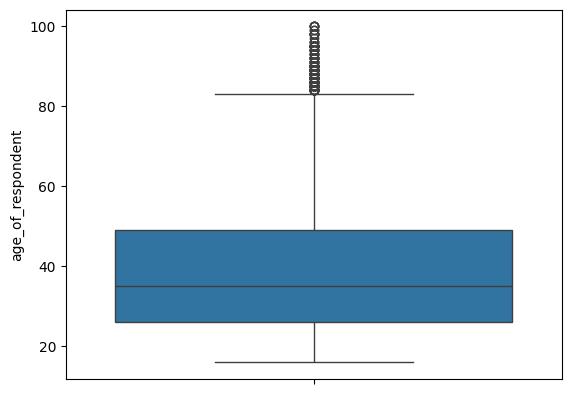

In [46]:
sb.boxplot(training_set['age_of_respondent'])

Notice above there are a lot of values greater than the upperlimit

There 2 ways of dealing with outliers first, is called Capping method, this is were values more than the upper limit or less than the lower limiit is replaced by those respective limit values, The second is called Trimming where values greater than the max capacity and less than the lower capacity are removed from the dataset, for this project we will be use Trimming method

In [48]:
outliers = training_set.loc[(training_set['age_of_respondent']>upper_limit)|(training_set['age_of_respondent']<lower_limit)]
outliers

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
209,Kenya,2018,uniqueid_210,0,Rural,No,3,95,Female,Parent,Widowed,No formal education,Informally employed
340,Kenya,2018,uniqueid_341,0,Rural,No,2,95,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
370,Kenya,2018,uniqueid_371,0,Rural,Yes,3,95,Male,Head of Household,Married/Living together,Primary education,Other Income
483,Kenya,2018,uniqueid_484,0,Rural,No,1,93,Female,Head of Household,Widowed,No formal education,Government Dependent
681,Kenya,2018,uniqueid_682,0,Rural,No,4,90,Male,Head of Household,Widowed,No formal education,Government Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21852,Uganda,2018,uniqueid_430,0,Rural,No,2,90,Female,Head of Household,Widowed,No formal education,Other Income
22154,Uganda,2018,uniqueid_732,0,Rural,No,2,98,Female,Head of Household,Widowed,No formal education,Government Dependent
22995,Uganda,2018,uniqueid_1573,0,Rural,No,4,95,Female,Spouse,Married/Living together,Primary education,No Income
23053,Uganda,2018,uniqueid_1631,0,Urban,No,2,98,Female,Head of Household,Widowed,No formal education,No Income


so now lets see the total number of outliers

In [50]:
len(outliers)

101

now lets remove the outliers 

In [55]:
new_data = training_set.loc[(training_set['age_of_respondent']<upper_limit)&(training_set['age_of_respondent']>lower_limit)]
print(len("data without outliers: "new_data),",","Original"len(training_set))

23423 , 23524


Now we visaualize the data to show if there's a relationship between the target value and the independent variable(predictor) form here we can better explain the dataset

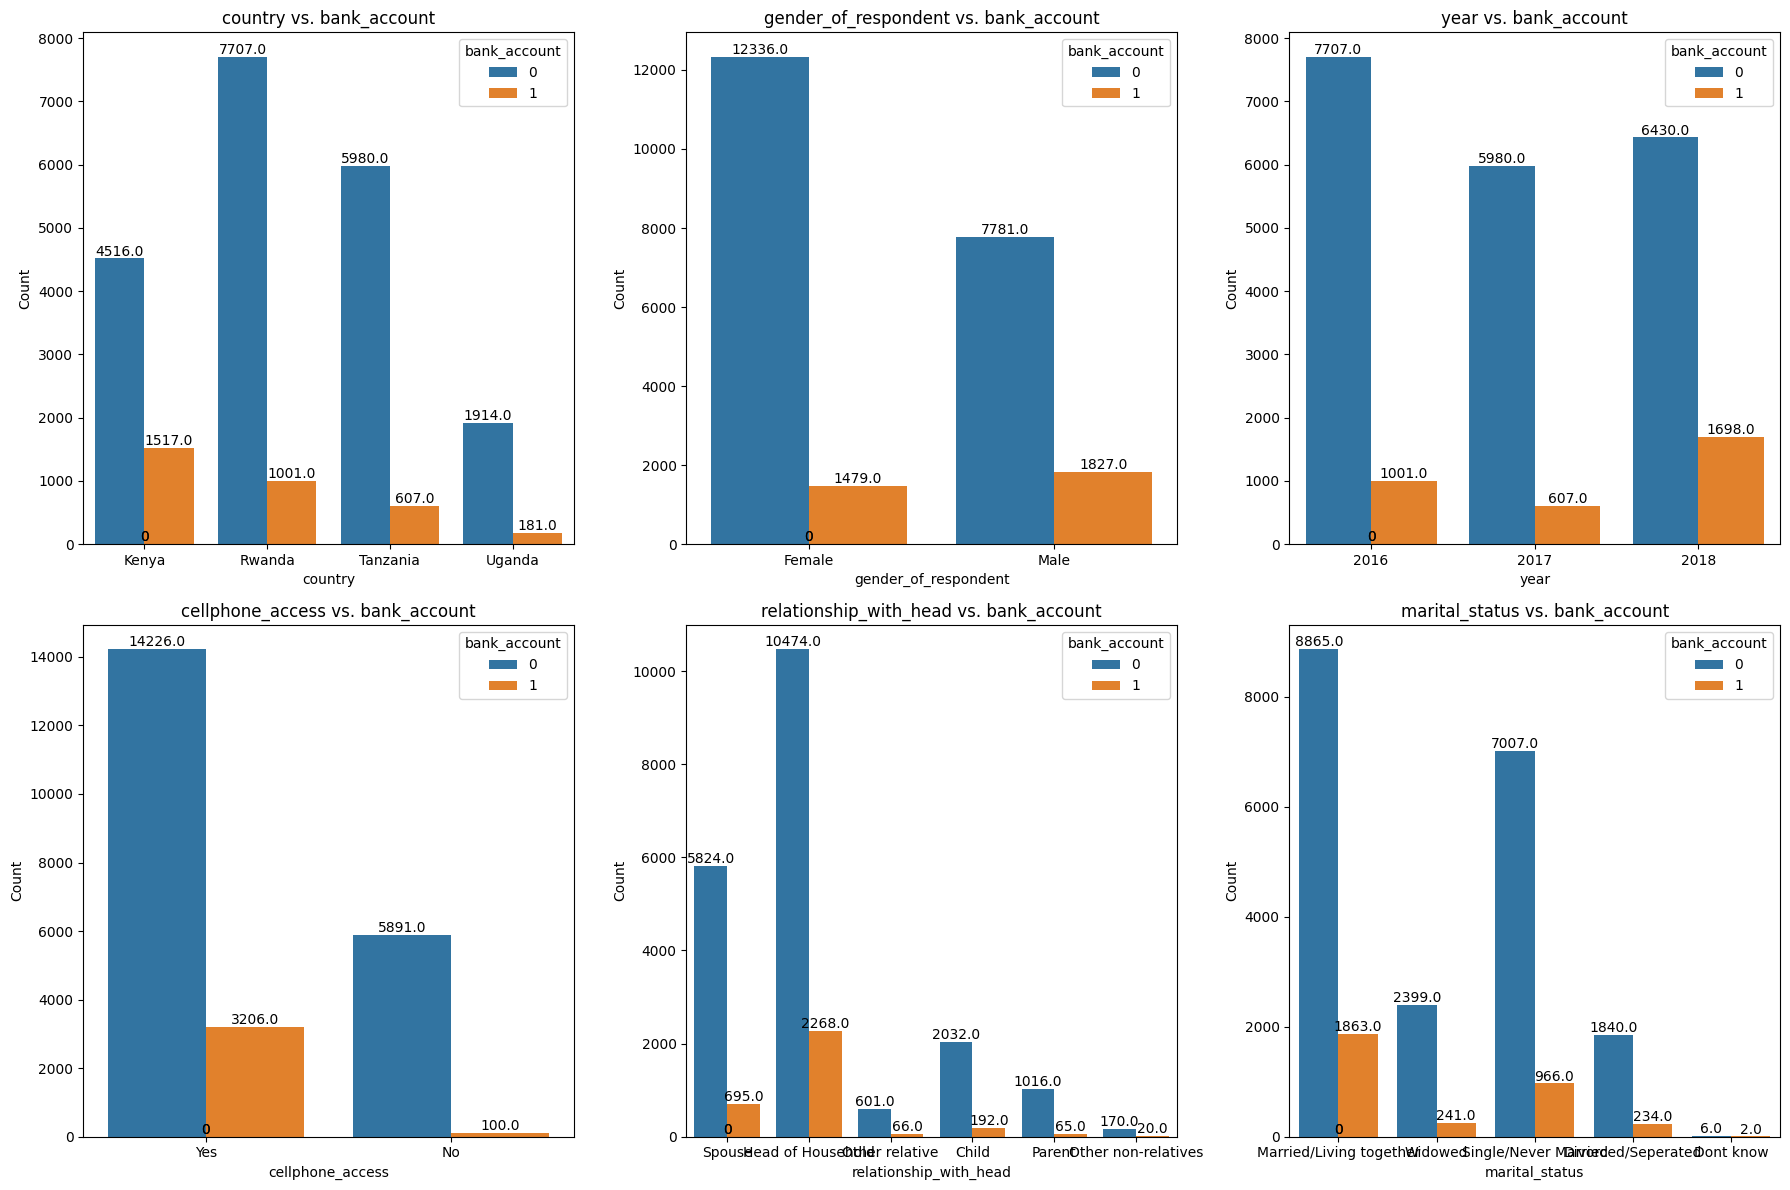

In [56]:
import matplotlib.pyplot as plt
features = ['country', 'gender_of_respondent', 'year', 'cellphone_access', 'relationship_with_head','marital_status','education_level','job_type']
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for ax, feature in zip(axs.flatten(), features):
    sb.countplot(x=feature, hue='bank_account', data=new_data, ax=ax)
    ax.set_title(f'{feature} vs. bank_account')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    # Add values on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

Okay so above shows the plotted values between the target values(Bank account) and independent values(country,gender,etc)

and below we transform categorical values into numerical values using labelEncoding

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
training_set['bank_account'] = le.fit_transform(training_set['bank_account'])

#Separate training features from target
X_train = training_set.drop(['bank_account'], axis=1)
y_train = training_set['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


Alright now lets create a function to do the encoding and use it to perform all the preprocessing

In [59]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

Now that we've done that lets pass in the testing and training set

In [60]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(testing_set)

now we proceed to model selection

In [62]:
print(processed_train.shape)

(23524, 37)


In [61]:
import sklearn.model_selection

inorder to find  the best model to use and train our data we can slit it into diffrent parts use diffrent models and see how well it performs

In [63]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [65]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11177220569485757


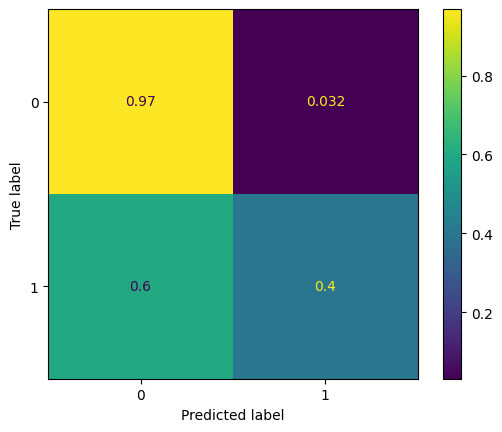

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_val, xg_model.predict(X_Val), normalize='true')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xg_model.classes_)
disp.plot()


in the output above there was more Zero values in the data set than 1 thats why our model performed poorly in the 1 class

In [74]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 1, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


C:\Users\NEPC\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [05:04:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_child_weighth" } are not used.

  warnings.warn(smsg, UserWarning)


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.11177220569485757


there were no changes to my error rate, so lemme try out Evolutionary algorithm


In [76]:
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Ensure X_Train and y_Train are in the correct format
X_train, X_test, y_train, y_test = train_test_split(X_Train, y_Train, test_size=0.2, random_state=42)

# Use TPOT to optimize hyperparameters
tpot = TPOTClassifier(
    generations=5,           # Number of generations to evolve
    population_size=20,      # Population size for each generation
    verbosity=2,             # Verbosity level for output
    scoring='accuracy',      # Scoring metric to optimize
    random_state=42,         # For reproducibility
    config_dict={
        'xgboost.XGBClassifier': {
            'min_child_weight': range(1, 10),
            'gamma': [0, 0.1, 0.2, 0.5, 1, 1.5, 2],
            'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
            'max_depth': range(3, 10),
        }
    }
)

# Fit TPOT and find the best model
tpot.fit(X_train, y_train)

# Get the best pipeline and hyperparameters
print("Best pipeline:", tpot.fitted_pipeline_)

# Predict with the best model
y_pred = tpot.predict(X_test)

# Calculate error rate
error_rate = 1 - accuracy_score(y_test, y_pred)
print("Error rate of the optimized XGB classifier: ", error_rate)

# Optionally save the best pipeline
tpot.export('best_pipeline.py')


C:\Users\NEPC\AppData\Roaming\Python\Python312\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                             
Generation 1 - Current best internal CV score: 0.8874588371609067
                                                                             
Generation 2 - Current best internal CV score: 0.8874588371609067
                                                                             
Generation 3 - Current best internal CV score: 0.8875768137705492
                                                                              
Generation 4 - Current best internal CV score: 0.8875768137705492
                                                                              
Generation 5 - Current best internal CV score: 0.8875768137705492
                                                                              
Best pipeline: XGBClassifier(input_matrix, gamma=2, max_depth=5, min_child_weight=7, subsample=0.9)
Best pipeline: Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, bo

Okay my error  rate went down by 0.08 with the Evolutionary Algorithm lets use Bayesian optimization

In [77]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ensure X_Train and y_Train are in the correct format
X_train, X_test, y_train, y_test = train_test_split(X_Train, y_Train, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 2, step=0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0, step=0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }

    # Train the model with the selected hyperparameters
    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Create and optimize the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_params
print("Best parameters found by Bayesian Optimization: ", best_params)

# Train the model with the best parameters
best_model = XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)

# Predict with the best model
y_pred = best_model.predict(X_test)

# Calculate error rate
error_rate = 1 - accuracy_score(y_test, y_pred)
print("Error rate of the optimized XGB classifier: ", error_rate)


[I 2024-12-24 05:23:53,357] A new study created in memory with name: no-name-4dc7824b-2004-4b04-94ae-e7c18c28710b
C:\Users\NEPC\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [05:23:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-24 05:23:53,917] Trial 0 finished with value: 0.8840613931523023 and parameters: {'min_child_weight': 8, 'gamma': 0.4, 'subsample': 0.8, 'max_depth': 10, 'n_estimators': 277, 'learning_rate': 0.17127017821604726, 'colsample_bytree': 0.6091226219174372}. Best is trial 0 with value: 0.8840613931523023.
C:\Users\NEPC\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [05:23:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\le

Best parameters found by Bayesian Optimization:  {'min_child_weight': 4, 'gamma': 1.6, 'subsample': 0.9, 'max_depth': 6, 'n_estimators': 112, 'learning_rate': 0.15262418768301628, 'colsample_bytree': 0.6400347999258049}
Error rate of the optimized XGB classifier:  0.10720188902007088


with Bayesian optimization it went down by 0.010, Basically Bayesian is a probabilistic model based optimization technique that systematically balances exploration and exploitation,(ie:it focuses on promising regions while searching for unkwown areas)

Now lets predict for our testing set

In [78]:
testing_set.bank_account = xgb_model.predict(processed_test)

C:\Users\NEPC\AppData\Local\Temp\ipykernel_10912\1230137880.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  testing_set.bank_account = xgb_model.predict(processed_test)


In [79]:
submission = pd.DataFrame({"uniqueid": testing_set["uniqueid"] + " x " + testing_set["country"],
                           "bank_account": testing_set.bank_account})

lets see the result

In [81]:
submission.sample(5)

,uniqueid,bank_account
3919,uniqueid_10054 x Rwanda,0
4036,uniqueid_10171 x Rwanda,0
9791,uniqueid_2708 x Uganda,0
4099,uniqueid_10234 x Rwanda,0
6706,uniqueid_6981 x Tanzania,0


Okay looking good, now lets save the result

In [84]:
submission.to_csv('first_submission.csv', index = False)